In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
# sns.set(style="ticks")

data =pd.read_csv("Resources/CleanAirbnbData.csv")
datadf = pd.DataFrame(data)
# read data
datadf.head()

,ID,Name,Host ID,Host Name,Neighbourhood Group,Neighbourhood,Latitude,Longitude,Room Type,Price,Minimum Nights,Number of Reviews,Last Review,Reviews per Month,Calculated Host Listings Count,Availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [5]:
print(max(datadf['Calculated Host Listings Count']))

327


In [6]:
# Check null value
datadf.isnull().sum()

ID                                   0
Name                                 4
Host ID                              0
Host Name                            8
Neighbourhood Group                  0
Neighbourhood                        0
Latitude                             0
Longitude                            0
Room Type                            0
Price                                0
Minimum Nights                       0
Number of Reviews                    0
Last Review                       5207
Reviews per Month                 5207
Calculated Host Listings Count       0
Availability                         0
dtype: int64

In [7]:
# summary of dataset
datadf.describe()

,ID,Host ID,Latitude,Longitude,Price,Minimum Nights,Number of Reviews,Reviews per Month,Calculated Host Listings Count,Availability
count,3.136200e+04,3.136200e+04,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,26155.000000,31362.000000,31362.000000
mean,2.100481e+07,8.144950e+07,40.728401,-73.948745,162.050475,8.338658,31.852369,1.810126,10.334067,175.831994
std,1.148631e+07,8.673088e+07,0.056561,0.051397,254.425463,23.836703,51.636804,1.805707,40.700398,126.187636
min,2.539000e+03,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,1.000000
25%,1.167514e+07,8.620116e+06,40.688383,-73.983270,70.000000,2.000000,2.000000,0.450000,1.000000,55.000000
50%,2.254548e+07,4.109561e+07,40.723720,-73.954110,111.500000,3.000000,10.000000,1.230000,1.000000,168.000000
75%,3.119407e+07,1.452145e+08,40.763030,-73.930133,189.000000,5.000000,39.000000,2.680000,3.000000,305.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
# Cleaning up data.
# datadf.drop(['latitude'],axis=1, inplace=True)
# datadf.drop(['longitude'], axis=1, inplace=True)
# datadf.drop(['last_review'],axis=1, inplace=True)
# datadf.drop(['availability_365'],axis=1, inplace=True)
# datadf

In [13]:
# Host summary

In [10]:
host_count = len(datadf['Host ID'].unique())
id_count = len(datadf['ID'].unique())
host=pd.DataFrame({"Host Count":[host_count],"List ID count":[id_count]})
host

,Host Count,List ID count
0,21809,31362


In [11]:
mutiple_list_count=datadf['Host ID'].value_counts()
mutiple_list_count.describe()

count    21809.000000
mean         1.438030
std          3.549362
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        327.000000
Name: Host ID, dtype: float64

In [13]:
list_bins = [0,1,5, 10, 20,30,50,100,200,max(datadf['Calculated Host Listings Count'])]
list_group_names =['1_list','under 5_list','under 10_list','under 20_list','under 30_list','under 50_list','under 100_list','under 200_list','more than 201units']
datadf["Mutiple Listing"] = pd.cut(datadf["Calculated Host Listings Count"], list_bins, labels=list_group_names)
list_Demographics = pd.DataFrame(datadf["Mutiple Listing"].value_counts())
# total_list = len(datadf["ID"]) 
# list_Demographics["Percentage of listing"]= round(list_Demographics["Mutiple Listing"]/ total_list *100,2)
# list_Demographics["Percentage of listing"]= list_Demographics["Percentage of listing"].map("{:.2f}%".format)
list_Demographics


,Mutiple Listing
1_list,17393
under 5_list,9370
under 10_list,1731
under 20_list,712
more than 201units,559
under 50_list,556
under 100_list,526
under 30_list,302
under 200_list,213


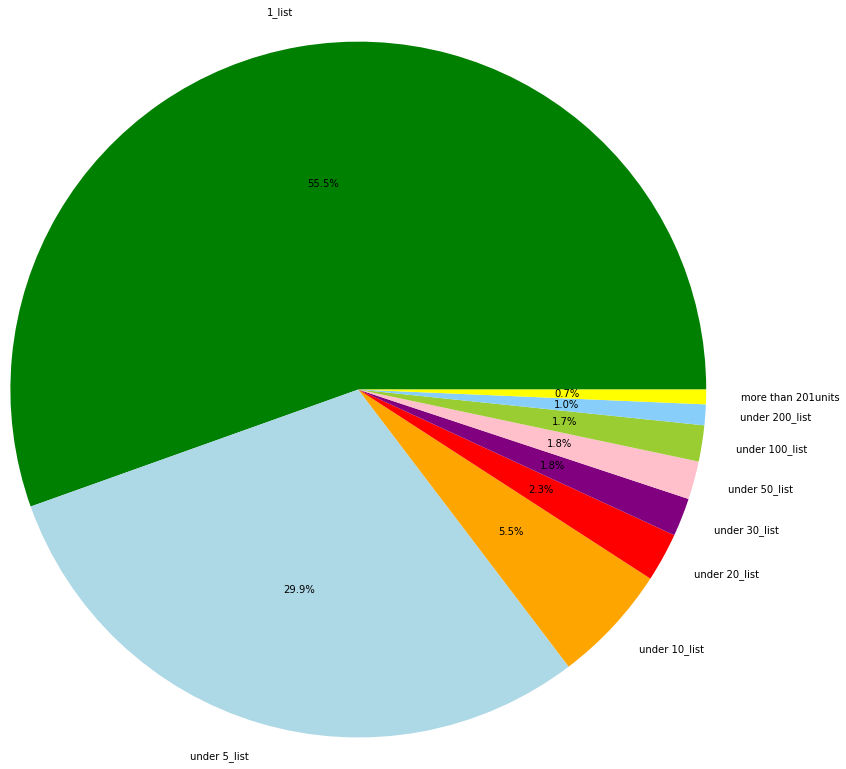

In [15]:
pies = ['1_list','under 5_list','under 10_list','under 20_list','under 30_list','under 50_list','under 100_list','under 200_list','more than 201units']
pie_votes = list_Demographics["Mutiple Listing"]
colors = ["green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","yellow"]
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(pie_votes, labels=pies,colors=colors,autopct="%1.1f%%",radius=4)
plt.show()

<BarContainer object of 9 artists>

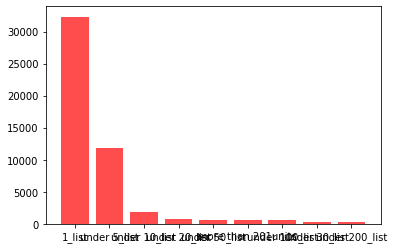

In [44]:
plt.bar( list_Demographics.index, list_Demographics["Mutiple Listing"],color='r',alpha=0.7,align ='center')

In [16]:
# price Demographics
min_p = min(datadf['Price'])
max_p = max(datadf['Price'])
mean_p = datadf['Price'].mean()
print(f'min price:{min_p}, max price:{max_p},mean_p:{mean_p}')


min price:0, max price:10000,mean_p:162.05047509725145


In [18]:
price_bins = [0,50,100, 150, 200,250,300,1000, max(datadf['Price'])]
price_group_names =['under 50','under 100','under 150','under 200','under 250','under 300','under 1000','over 1001']
datadf["Price categories"] = pd.cut(datadf["Price"], price_bins, labels=price_group_names)
datadf["list_price"] = pd.cut(datadf["Price"], price_bins, labels=price_group_names)
price_Demographics = pd.DataFrame(datadf["list_price"].value_counts())
# price_Demographics["list_price"]= round(price_Demographics["list_price"]/ total_list *100,2)
# list_Demographics["Percentage of listing"]= list_Demographics["Percentage of listing"].map("{:.2f}%".format)
price_Demographics

,list_price
under 100,10763
under 150,6226
under 200,4262
under 50,3934
under 1000,2438
under 250,2214
under 300,1345
over 1001,172


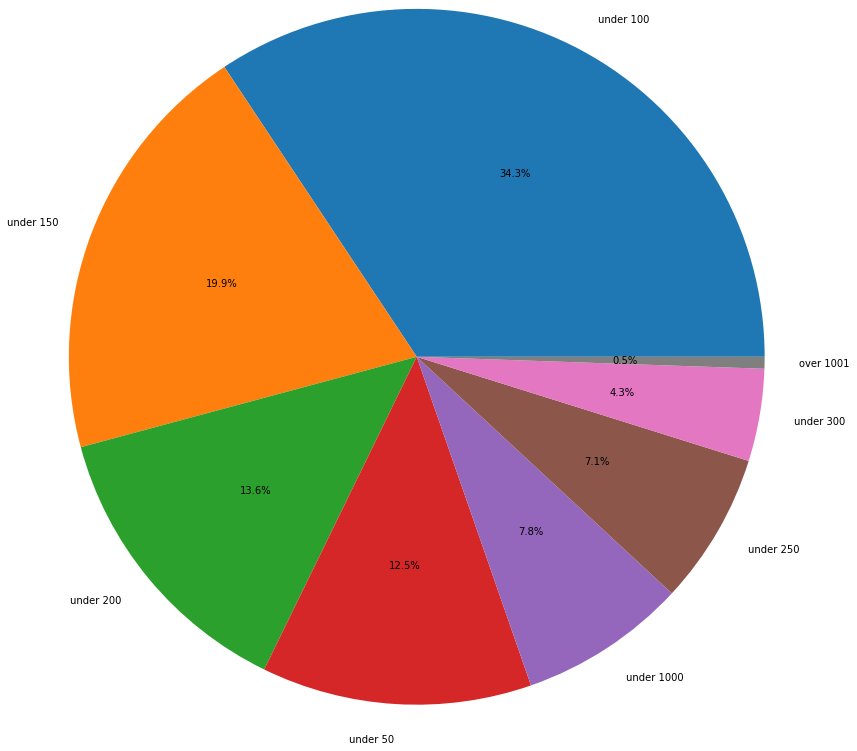

In [20]:
plt.pie(price_Demographics['list_price'],labels=price_Demographics.index,autopct="%1.1f%%",radius=4)
plt.show()




In [22]:
area_mean=datadf.groupby('neighbourhood_group').count()
area_mean

group1=datadf.groupby(['neighbourhood_group',"price categories.).count

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Bronx,1091,1090,1091,1090,1091,1091,1091,1091,1091,1091,1091,876,876,1091,1091
Brooklyn,20104,20098,20104,20095,20104,20104,20104,20104,20104,20104,20104,16447,16447,20104,20104
Manhattan,21661,21652,21661,21652,21661,21661,21661,21661,21661,21661,21661,16632,16632,21661,21661
Queens,5666,5666,5666,5664,5666,5666,5666,5666,5666,5666,5666,4574,4574,5666,5666
Staten Island,373,373,373,373,373,373,373,373,373,373,373,314,314,373,373


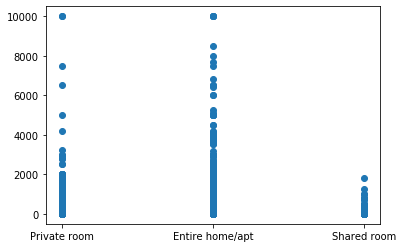

In [13]:
plt.scatter(datadf['room_type'], datadf['price'])


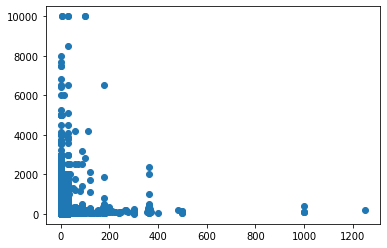

In [17]:
plt.scatter(datadf['minimum_nights'], datadf['price'])